<a href="https://colab.research.google.com/github/imtiajahmed318/Data-Analysis-with-python/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the 'laptop_price - dataset.csv' file when prompted.


Saving laptop_price - dataset.csv to laptop_price - dataset.csv
Dataset loaded successfully!

--- First 5 rows of the dataset ---
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

    

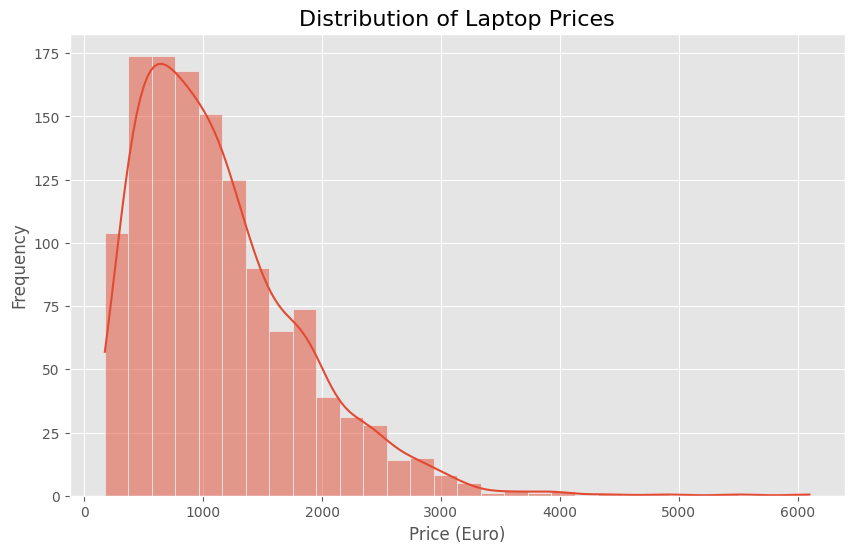


--- Generating Price vs. RAM plot... ---


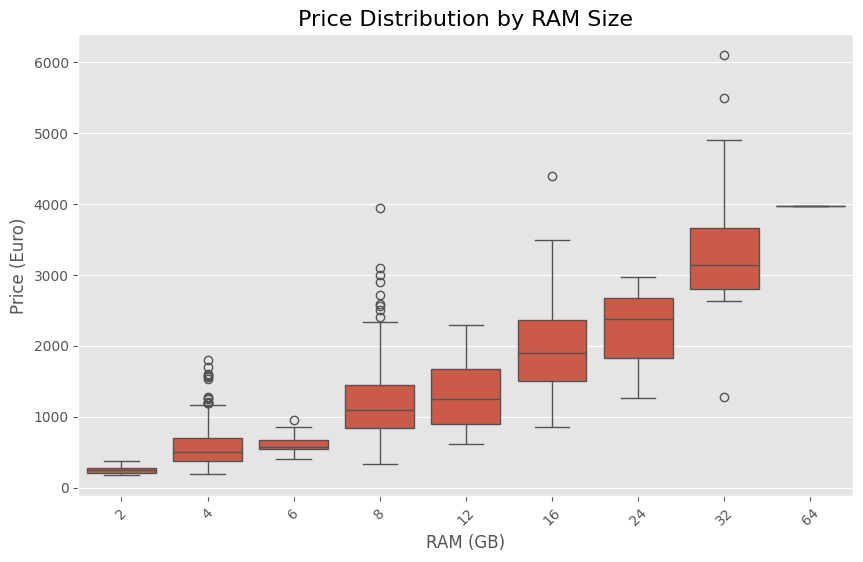


--- Generating Price vs. Operating System plot... ---


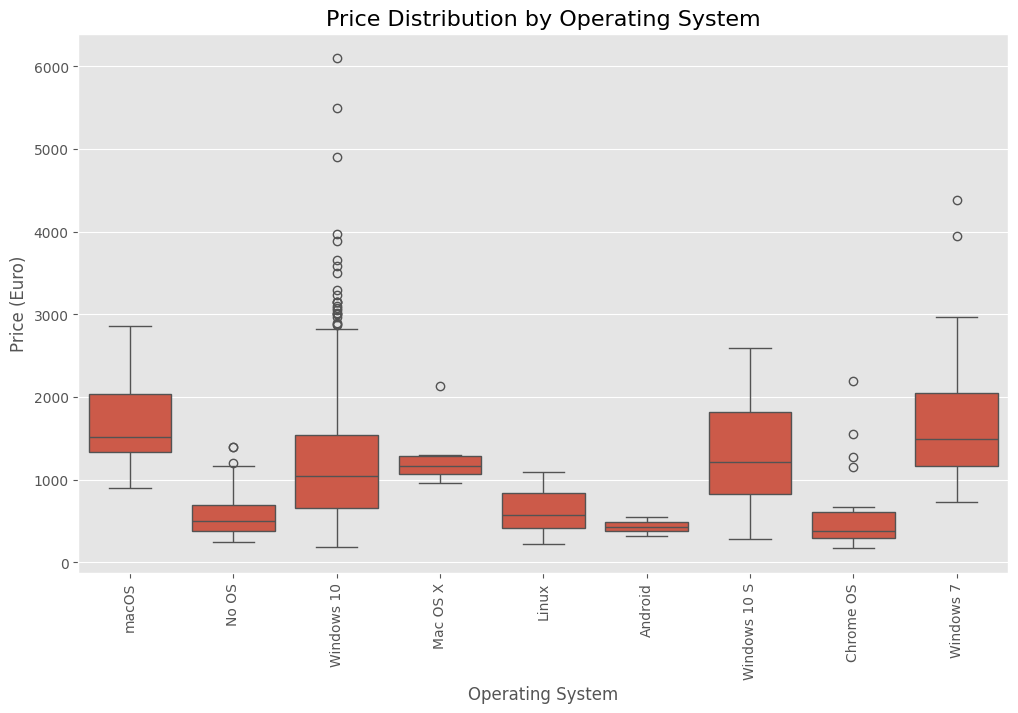


--- Preprocessing and Feature Engineering ---

 Engineered features from ScreenResolution:
   X_res  Y_res  IPS Panel  Touchscreen
0   2560   1600          1            0
1   1440    900          0            0
2   1920   1080          0            0
3   2880   1800          1            0
4   2560   1600          1            0


ValueError: invalid literal for int() with base 10: '1.0000'

In [ ]:
#
# Data Analysis Project: Laptop Price Prediction
#
# This script guides you through a full data analysis and machine learning project
# using the 'laptop_price - dataset.csv' file. The objective is to predict the
# price of a laptop based on its features. This project includes:
#
# 1. Data Loading and Initial Exploration
# 2. Comprehensive Exploratory Data Analysis (EDA)
# 3. Data Preprocessing and Feature Engineering
# 4. Building and Training a Linear Regression Model
# 5. Evaluating the Model's Performance
#
# The code is designed to be run in a Google Colab environment.
#

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

# Use a professional style for Matplotlib plots
plt.style.use('ggplot')

# Step 2: Load the dataset
# A message will appear asking you to upload the file.
# Please upload the "laptop_price - dataset.csv" file.
print("Please upload the 'laptop_price - dataset.csv' file when prompted.")
try:
    # Upload the file from your local system to the Colab environment
    uploaded = files.upload()
    file_name = "laptop_price - dataset.csv"
    df = pd.read_csv(file_name, encoding='latin-1') # Use latin-1 encoding to prevent read errors
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"An error occurred: {e}")
    # Fallback: create a dummy DataFrame if the file upload fails
    print("Creating a dummy DataFrame for demonstration...")
    data = {
        'Company': ['Apple', 'HP', 'Dell'],
        'Product': ['MacBook Pro', '250 G6', 'Inspiron 3567'],
        'TypeName': ['Ultrabook', 'Notebook', 'Notebook'],
        'Inches': [13.3, 15.6, 15.6],
        'ScreenResolution': ['IPS Panel Retina Display 2560x1600', 'Full HD 1920x1080', '1366x768'],
        'CPU_Company': ['Intel', 'Intel', 'Intel'],
        'CPU_Type': ['Core i5', 'Core i5 7200U', 'Core i7 7500U'],
        'CPU_Frequency (GHz)': [2.3, 2.5, 2.7],
        'RAM (GB)': [8, 8, 8],
        'Memory': ['128GB SSD', '256GB SSD', '1TB HDD'],
        'GPU_Company': ['Intel', 'Intel', 'AMD'],
        'GPU_Type': ['Iris Plus Graphics 640', 'HD Graphics 620', 'Radeon R5 M430'],
        'OpSys': ['macOS', 'No OS', 'Linux'],
        'Weight (kg)': [1.37, 1.86, 2.3],
        'Price (Euro)': [1339.69, 575.0, 805.99]
    }
    df = pd.DataFrame(data)

# Step 3: Exploratory Data Analysis (EDA)
print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Dataset information ---")
df.info()

print("\n--- Missing values per column ---")
print(df.isnull().sum())

print("\n--- Number of duplicate rows ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

print("\n--- Descriptive statistics ---")
print(df.describe())

# Visualize the distribution of the target variable (Price)
print("\n--- Generating Price Distribution plot... ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['Price (Euro)'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euro)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize the relationship between RAM and Price
print("\n--- Generating Price vs. RAM plot... ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.title('Price Distribution by RAM Size', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Visualize the relationship between Operating System and Price
print("\n--- Generating Price vs. Operating System plot... ---")
plt.figure(figsize=(12, 7))
sns.boxplot(x='OpSys', y='Price (Euro)', data=df)
plt.title('Price Distribution by Operating System', fontsize=16)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Step 4: Data Preprocessing and Feature Engineering
print("\n--- Preprocessing and Feature Engineering ---")

# Drop columns that are not useful for a simple regression model
# 'Product' and 'GPU_Type' are too detailed and would create too many features.
df.drop(['Product', 'GPU_Type', 'CPU_Type'], axis=1, inplace=True)

# Engineer features from 'ScreenResolution'
# Extract resolution numbers and a boolean for 'IPS Panel'
df['Resolution'] = df['ScreenResolution'].str.split(' ').str[-1]
df['X_res'] = df['Resolution'].str.split('x').str[0].astype(int)
df['Y_res'] = df['Resolution'].str.split('x').str[1].astype(int)
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.drop(['ScreenResolution', 'Resolution'], axis=1, inplace=True)
print("\n Engineered features from ScreenResolution:")
print(df[['X_res', 'Y_res', 'IPS Panel', 'Touchscreen']].head())

# Engineer features from 'Memory'
# Extract storage size and type
df['Memory_Size'] = df['Memory'].str.replace('GB','').str.replace('TB','000').str.split(' ').str[0].astype(int)
df['Memory_Type'] = df['Memory'].str.split(' ').str[1]
df.drop('Memory', axis=1, inplace=True)
print("\n Engineered features from Memory:")
print(df[['Memory_Size', 'Memory_Type']].head())

# Handle categorical variables with one-hot encoding
categorical_cols = ['Company', 'TypeName', 'CPU_Company', 'GPU_Company', 'OpSys', 'Memory_Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\n DataFrame after one-hot encoding:")
print(df.head())

# Step 5: Build a Machine Learning Model (Linear Regression)
# Define the features (X) and the target variable (y)
X = df.drop('Price (Euro)', axis=1)
y = df['Price (Euro)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
print("\n--- Training the Linear Regression model... ---")
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Step 7: Visualize the Model's Performance
print("\n--- Generating Actual vs. Predicted plot... ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Laptop Prices', fontsize=16)
plt.xlabel('Actual Price (Euro)', fontsize=12)
plt.ylabel('Predicted Price (Euro)', fontsize=12)
plt.show()

# Display the coefficients of the linear regression model
print("\n--- Model Coefficients ---")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))